<a href="https://colab.research.google.com/github/hasanzeynal/TensorFlow-Developer-Certificate/blob/main/02_Neural_Network_Classification_in_TensorFlow/neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import tensorflow
import tensorflow as tf

## What we are gonna cover:
* The architecture of NN Classification Model
* Input Shapes and Output Shapes of NN Classification Model
* Creating Custom Data to view and fit
* Steps in modelling
  * Creating model, compile the model, fit the model, evaluate the model
* Different Classification Evaluation Methods
* Saving and Loading Models

# Creating Data to view and fit

In [2]:
#import make circles
from sklearn.datasets import make_circles

#create circles
X,y = make_circles(n_samples= 1000,
                   noise= 0.03,
                   random_state= 42)   #if you wanna work on classification problem,you can create your data with make_circles

In [3]:
#Check out the labels
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [4]:
import pandas as pd
pd.DataFrame(y).value_counts()   #it create 0 and 1's in the same numbers for the labels

0    500
1    500
dtype: int64

In [5]:
#let's change our x and y to the dataframe to visulise our data
circles = pd.DataFrame({'X_1':X[:,0], 'X_2':X[:,1], 'y':y})
circles

,X_1,X_2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


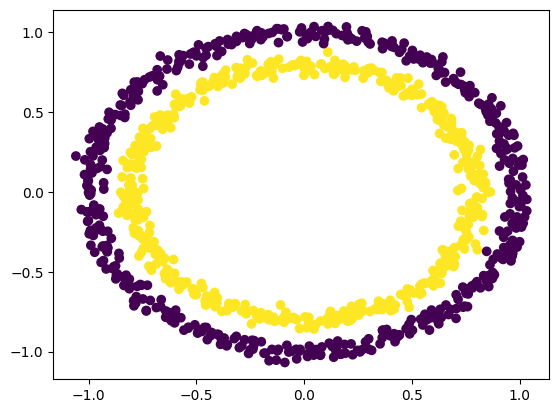

In [6]:
#import matplotlib
import matplotlib.pyplot as plt
#visualise the datas
plt.scatter(X[:,0], X[:,1],c= y)
#show the plot
plt.show()

# Input and Output Shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

# Modelling
We are gonna create some models until we make around 95+ accuracy score

In [12]:
#train test splitting
X_train = X[:800]
X_test = X[800:]

y_train = X[:800]
y_test = X[800:]

#looking for shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800, 2), (200, 2), (200, 2))

##Model 1

In [16]:
#creating model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss= 'mae',optimizer= 'sgd',metrics=['accuracy'])

#fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0086 - 

In [18]:
#get the predictions
predictions_1 = model_1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [19]:
model_1.evaluate(y_test)

7/7 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

## Model 2

In [22]:
#create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),   #1 hidden layer added
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss='mae', optimizer= 'adam', metrics= ['accuracy'])

#fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=20) #number of epochs is increased to the 20

Epoch 1/20
25/25 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.0000e+00
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.0000e+00
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.0000e+00
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.0000e+00
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0020 - 

In [24]:
#get the predictions
predictions_2 = model_2.predict(X_test)

#evaluate the model
model_2.evaluate(predictions_2)

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

## Model 3

In [26]:
#create the third model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),   # 1 hidden layer is added
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),   #loss is changed because our problem is binary classification
                optimizer= 'sgd',
                metrics= ['accuracy'])

#fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs= 25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: -0.0444 - accuracy: 0.0000e+00
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 

#Model 4

In [33]:


#create the model_4
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),  #number of hidden layers is increased
    tf.keras.layers.Dense(1, activation= 'softmax')  #activation function(Sigmoid) for output layer to get 1 answer instead of predictions
])

#compile the model
model_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr= 0.001),   #optimizer is chnaged to the Adam with learning rate of 0.001
                metrics = tf.keras.metrics.Accuracy())

#fit the model
model_4.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs= 100)  #number of epochs is increased about 100 to learn better

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 10/100
25/25 [==============================] - 0s 3ms/ste

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 5s 3ms/step - loss: 3.1130 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5655 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 2.3286 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.8566 - accuracy: 0.4110
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2264 - accuracy: 0.3750
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1273 - accuracy: 0.3830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0899 - accuracy: 0.4080
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0592 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0316 - accuracy: 0.4260
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0063 - accuracy: 0.4080
Epoch 11/

In [34]:
tf.random.set_seed(42)


model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),  #number of hidden layers is increased
    tf.keras.layers.Dense(1, activation= 'softmax')  #activation function(Sigmoid) for output layer to get 1 answer instead of predictions
])

#compile the model
model_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr= 0.001),   #optimizer is chnaged to the Adam with learning rate of 0.001
                metrics = tf.keras.metrics.Accuracy())

#fit the model
model_4.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs= 100)

Epoch 1/100
25/25 [==============================] - 3s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 10/100
25/25 [==============================] - 0s 3ms/ste

# If you have similar problem,
which is you have 0 accuracy, There can be few issues with your model, Check and fix

* Check your batch_size if it's too large or too small
* Check if the learning rate is too high or low
* if it's text dataset, check the length of sentences, if too large then trim with an average length
* Check if there are NaN values in your dataset, fix it
* Check if the dataset doesn't contain special symbols or characters
* If values are continuous, Normalize it before sending to the network ( check batch normalization )
* Try regularization techniques
* Check the activation functions
* Shuffle the data

In [56]:
#actually, i have checked all of them already instead of on,let's get shuffled our data
shuffled_circles = circles.sample(frac= 1)

#get the depenetend and independent variables
X = shuffled_circles.drop('y',axis=1)
y = shuffled_circles['y']

#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 1)

## Model 5

In [57]:
#Create the model 5
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'softmax')
])

#compile the model
model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= 'adam',
                metrics= ['accuracy'])

#fit the kodel
model_5.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 6ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038
Epoch 10/10
25/25 [==============================] - 0s 5ms/step - loss: 7.5674 - accuracy: 0.5038


In [69]:

predictions_5 = model_5.predict(X_test)
model_5.evaluate(predictions_5)

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [67]:
pd.DataFrame(tf.expand_dims(predictions_5,axis=1))

ValueError: ignored

In [84]:
#Create the model 5
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

#compile the model
model_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics= ['accuracy'])

#fit the kodel
model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5240
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.5860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.8010
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.9020
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.9660
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.9860
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.9960
Epoch 11/

In [81]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 5.7782e-04 - accuracy: 1.0000


[0.0005778155755251646, 1.0]

In [85]:
model_6.predict(X_test)

7/7 [==============================] - 0s 2ms/step


array([[9.99861240e-01],
       [1.83682403e-07],
       [1.15719107e-04],
       [1.25413535e-05],
       [2.94613128e-04],
       [9.99989748e-01],
       [9.99989152e-01],
       [9.99999404e-01],
       [1.50022702e-03],
       [8.44157487e-03],
       [5.80186257e-04],
       [9.99997616e-01],
       [9.99997735e-01],
       [1.44472233e-05],
       [9.04556487e-07],
       [6.70861482e-08],
       [1.67417122e-04],
       [9.99902964e-01],
       [9.99993563e-01],
       [9.99820530e-01],
       [9.99941826e-01],
       [1.29690779e-05],
       [1.37724601e-06],
       [1.36141578e-04],
       [9.99864578e-01],
       [5.23120389e-06],
       [9.99998450e-01],
       [9.99997735e-01],
       [1.16293415e-06],
       [2.47303600e-04],
       [9.99996185e-01],
       [9.99963403e-01],
       [4.85676537e-07],
       [1.78724676e-02],
       [6.75459296e-06],
       [1.55959468e-04],
       [1.42332847e-05],
       [2.57619228e-02],
       [2.60432577e-03],
       [9.99954939e-01],
